In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
%matplotlib inline

In [26]:
data=pd.read_csv("covid_19_india.csv")
data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [27]:
data.dtypes

Sno                          int64
Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object

In [28]:
data['Date']=pd.to_datetime(data['Date'],format="%Y-%m-%d")

In [29]:
data.dtypes

Sno                                  int64
Date                        datetime64[ns]
Time                                object
State/UnionTerritory                object
ConfirmedIndianNational             object
ConfirmedForeignNational            object
Cured                                int64
Deaths                               int64
Confirmed                            int64
dtype: object

In [30]:
data.rename(columns={'State/UnionTerritory':'States','Cured':'Recovered'},inplace=True)

In [31]:
data.head()

,Sno,Date,Time,States,ConfirmedIndianNational,ConfirmedForeignNational,Recovered,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [32]:
data.drop(['Sno','Time','ConfirmedIndianNational','ConfirmedForeignNational'],axis=1,inplace=True)

In [33]:
data.head()

,Date,States,Recovered,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [34]:
data['Active']=data['Confirmed']-data['Deaths']-data['Recovered']

In [35]:
data.head()

,Date,States,Recovered,Deaths,Confirmed,Active
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-02-01,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-02-03,Kerala,0,0,3,3


In [36]:
data[data.duplicated]

,Date,States,Recovered,Deaths,Confirmed,Active


In [37]:
data.shape

(18110, 6)

In [38]:
ind_cases=data[data['Date']==data['Date'].max()].copy()

In [39]:
ind_cases.dtypes

Date         datetime64[ns]
States               object
Recovered             int64
Deaths                int64
Confirmed             int64
Active                int64
dtype: object

In [40]:
ind_cases

,Date,States,Recovered,Deaths,Confirmed,Active
18074,2021-08-11,Andaman and Nicobar Islands,7412,129,7548,7
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182,18882
18076,2021-08-11,Arunachal Pradesh,47821,248,50605,2536
18077,2021-08-11,Assam,559684,5420,576149,11045
18078,2021-08-11,Bihar,715352,9646,725279,281
18079,2021-08-11,Chandigarh,61150,811,61992,31
18080,2021-08-11,Chhattisgarh,988189,13544,1003356,1623
18081,2021-08-11,Dadra and Nagar Haveli and Daman and Diu,10646,4,10654,4
18082,2021-08-11,Delhi,1411280,25068,1436852,504
18083,2021-08-11,Goa,167978,3164,172085,943


In [41]:
ind_cases.columns

Index(['Date', 'States', 'Recovered', 'Deaths', 'Confirmed', 'Active'], dtype='object')

In [42]:
ind_cases.index=ind_cases['States']

In [47]:
ind_cases=ind_cases.drop(['States','Date'],axis=1)

In [48]:
ind_cases.head()

,Recovered,Deaths,Confirmed,Active
States,,,,
Andaman and Nicobar Islands,7412,129,7548,7
Andhra Pradesh,1952736,13564,1985182,18882
Arunachal Pradesh,47821,248,50605,2536
Assam,559684,5420,576149,11045
Bihar,715352,9646,725279,281


In [49]:
ind_cases.reset_index(level=0,inplace=True)

In [50]:
top_10_confirmed=ind_cases.sort_values(by='Confirmed',ascending=False).head(10)

In [51]:
top_10_confirmed

,States,Recovered,Deaths,Confirmed,Active
20,Maharashtra,6159676,134201,6363442,69565
16,Kerala,3396184,18004,3586693,172505
15,Karnataka,2861499,36848,2921049,22702
30,Tamil Nadu,2524400,34367,2579130,20363
1,Andhra Pradesh,1952736,13564,1985182,18882
34,Uttar Pradesh,1685492,22775,1708812,545
35,West Bengal,1506532,18252,1534999,10215
8,Delhi,1411280,25068,1436852,504
6,Chhattisgarh,988189,13544,1003356,1623
25,Odisha,972710,6565,988997,9722


Text(0.5, 1.0, 'Top 10 Confirmed Cases')

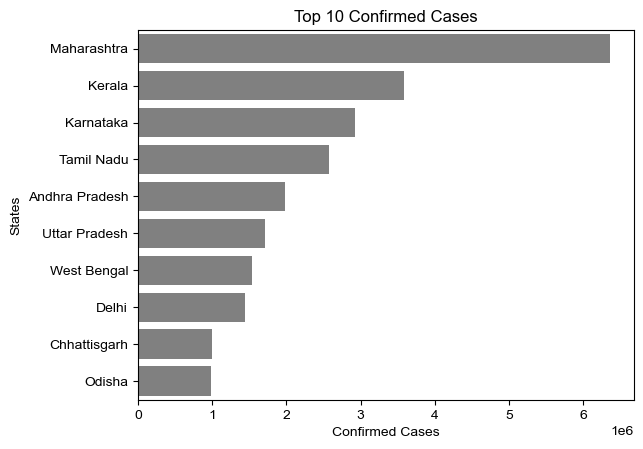

In [52]:
sns.barplot(x='Confirmed',y='States',data=top_10_confirmed,color='grey')
sns.set(rc={'figure.figsize':(10,6)})
plt.xlabel('Confirmed Cases')
plt.ylabel('States')
plt.title('Top 10 Confirmed Cases')

In [53]:
top_10_deaths=ind_cases.sort_values(by='Deaths',ascending=False).head(10)

Text(0.5, 1.0, 'Top 10 State wise deaths')

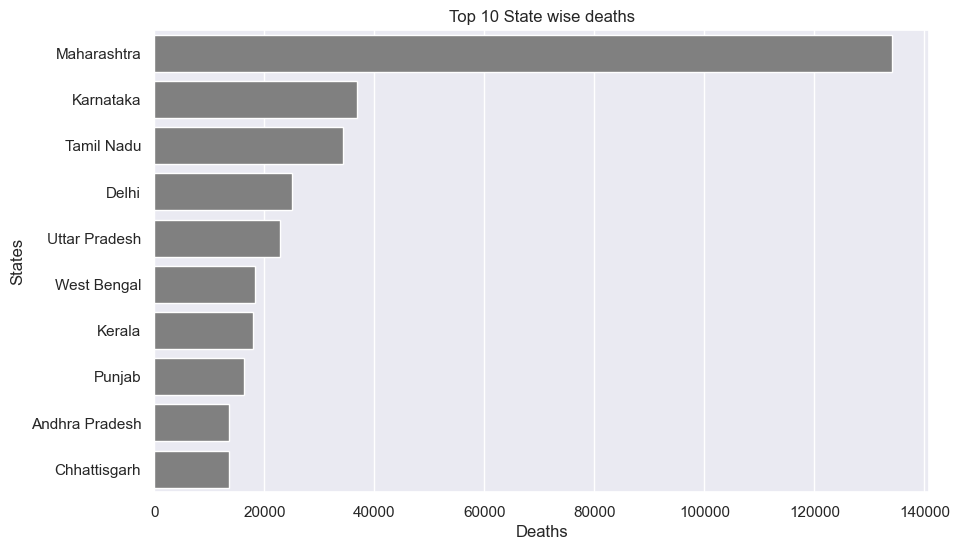

In [54]:
sns.barplot(x='Deaths',y='States',data=top_10_deaths,color='grey')
sns.set(rc={'figure.figsize':(10,6)})
plt.title("Top 10 State wise deaths")